In [72]:
protein_alphabet = [
    "A",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "K",
    "L",
    "M",
    "N",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "V",
    "W",
    "Y",
]

ga98 = 'TTYKLILNLKQAKEEAIKELVDAGTAEKYFKLIANAKTVEGVWTLKDEIKTFTVTE'
gb98 = 'TTYKLILNLKQAKEEAIKELVDAGTAEKYFKLIANAKTVEGVWTYKDEIKTFTVTE'

In [2]:
import matplotlib.pyplot as plt

In [8]:
from Bio import motifs, SeqIO
import os
from tqdm import tqdm

In [67]:
files = os.listdir('mutations')

In [123]:
ga_point = []
ga_del = []
ga_ins = []
gb_point = []
gb_del = []
gb_ins = []

In [124]:
len(ga_del)

0

In [125]:
previous = []
i = 0
for f in files:
    if f in previous:
        print("repeat")
        i += 1
    previous.append(f)
    sequence = SeqIO.read("mutations/{}".format(f), "fasta").seq
    if 'GA' in f:
        if 'DM' in f:
            ga_del.append(sequence)
        if 'IM' in f:
            ga_ins.append(sequence)
        elif 'PM' in f:
            ga_point.append(sequence)
    else:
        if 'DM' in f:
            gb_del.append(sequence)
        if 'IM' in f:
            gb_ins.append(sequence)
        elif 'PM' in f:
            gb_point.append(sequence)

In [126]:
len(gb_point)

200

In [127]:
ga_point[0]

Seq('TTYKLILNLKQAKEEAIKELVDAGTAEKYFKLIANAKVVEGVWTLKDEIKTFTVTE')

In [74]:
ga_point_motif = motifs.create(ga_point, alphabet=protein_alphabet)

In [77]:
ga_point_motif.consensus

Seq('TTYKLILNLKQAKEEAIKELVDAGTAEKYFKLIANAKTVEGVWTLKDEIKTFTVTE')

In [95]:
ga_point_motif = motifs.create(ga_point, alphabet=protein_alphabet)
ga_del_motif = motifs.create(ga_del, alphabet=protein_alphabet)
ga_ins_motif =  motifs.create(ga_ins, alphabet=protein_alphabet)
gb_point_motif = motifs.create(gb_point, alphabet=protein_alphabet)
gb_del_motif = motifs.create(gb_del, alphabet=protein_alphabet)
gb_ins_motif =  motifs.create(gb_ins, alphabet=protein_alphabet)

In [102]:
ga_point_motif.weblogo('ga_point_motif.png')
ga_del_motif.weblogo('ga_del_motif.png')
ga_ins_motif.weblogo('ga_ins_motif.png')

In [103]:
gb_point_motif.weblogo('gb_point_motif.png')
gb_del_motif.weblogo('gb_del_motif.png')
gb_ins_motif.weblogo('gb_ins_motif.png')

# Find the mutations and number them

In [238]:
def plot_histogram(mutation_set, original_sequence, plotname):
    locations = []
    letters = []
    for s in mutation_set:
        i = 0
        for original, mutation in zip(original_sequence, s):
            if original != mutation:
                locations.append(i)
                letters.append(mutation)
                break
            i += 1
    fig, axs = plt.subplots(1,2, figsize=(20, 5))
    fig.suptitle('Frequency plots for {}'.format(plotname))
    axs[0].hist(locations)
    axs[0].set(xlabel = 'Location')
    axs[1].hist(letters, color="green")
    axs[1].set(xlabel = 'Letter')

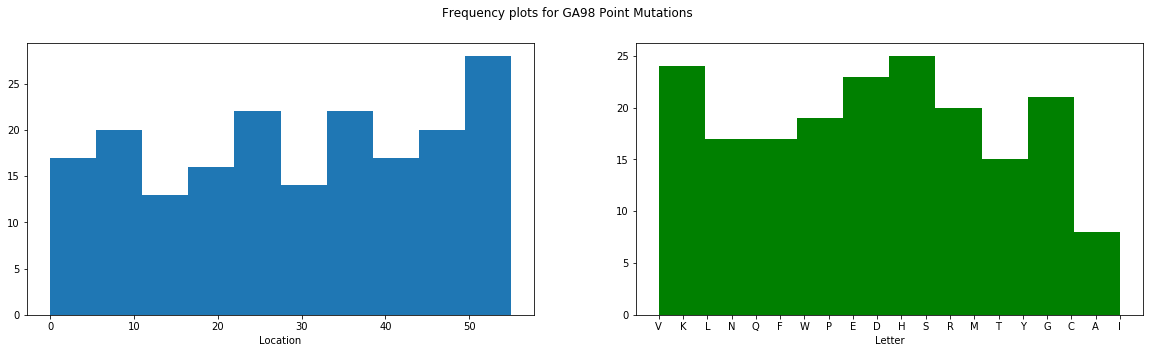

In [239]:
plot_histogram(ga_point, ga98, "GA98 Point Mutations")

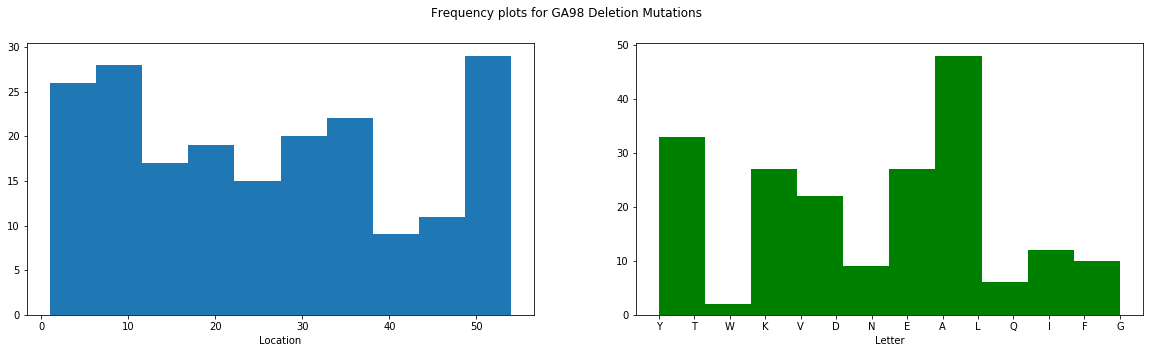

In [240]:
plot_histogram(ga_del, ga98, "GA98 Deletion Mutations") # we don't expect the letters to be even for this one

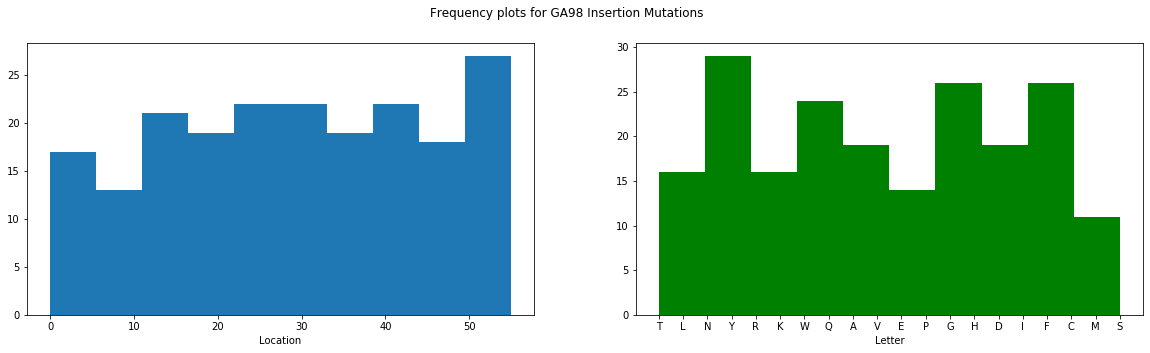

In [241]:
plot_histogram(ga_ins, ga98, "GA98 Insertion Mutations") # we do expect the letters to be even for this one

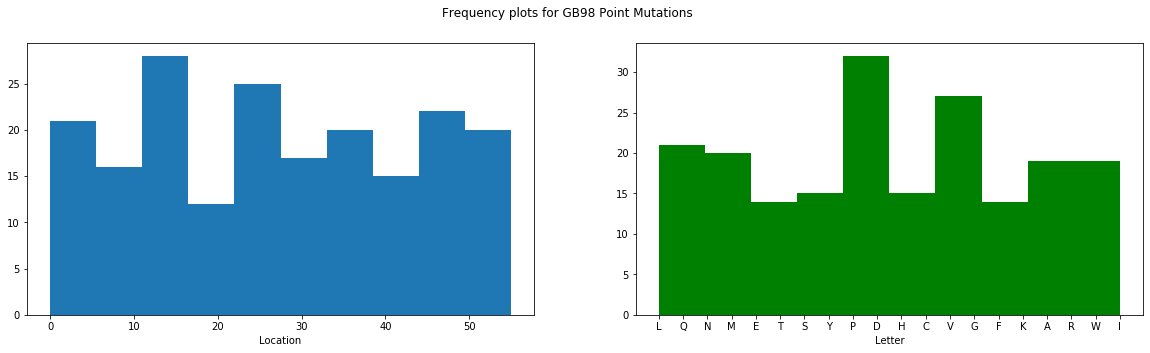

In [243]:
plot_histogram(gb_point, gb98, "GB98 Point Mutations")

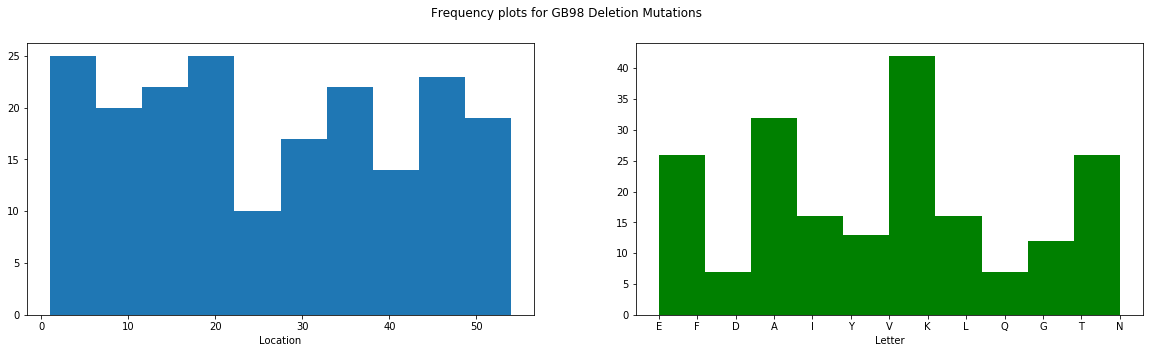

In [244]:
plot_histogram(gb_del, gb98, "GB98 Deletion Mutations") # we don't expect the letters to be even for this one

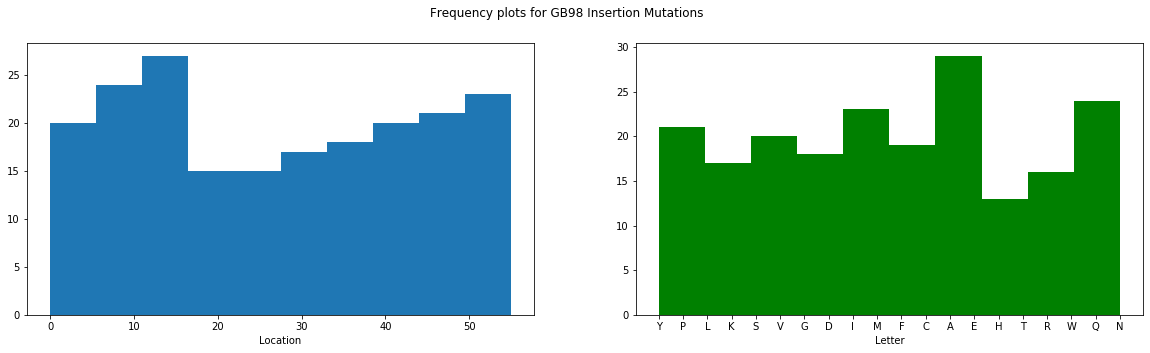

In [245]:
plot_histogram(gb_ins, gb98, "GB98 Insertion Mutations")